In [1]:
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
iris = pd.read_csv("./csvfiles/IRIS.csv")

In [5]:
iris.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
x = iris.drop("SPECIES", axis = 1)
y = iris["SPECIES"]

In [7]:
x.corr()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
SEPAL_LENGTH,1.000000,-0.117570,0.871754,0.817941
SEPAL_WIDTH,-0.117570,1.000000,-0.428440,-0.366126
PETAL_LENGTH,0.871754,-0.428440,1.000000,0.962865
PETAL_WIDTH,0.817941,-0.366126,0.962865,1.000000


In [9]:
pca = PCA(n_components=4)

x_pca = pca.fit_transform(x)
print("PCA Data :\n {}".format(x_pca[:5]))
print("Shape :\n {}".format(x_pca.shape))
ds_x_pca = pd.DataFrame(x_pca, columns=["Prin1","Prin2","Prin3","Prin4",])

PCA Data :
 [[-2.68412563e+00  3.19397247e-01 -2.79148276e-02 -2.26243707e-03]
 [-2.71414169e+00 -1.77001225e-01 -2.10464272e-01 -9.90265503e-02]
 [-2.88899057e+00 -1.44949426e-01  1.79002563e-02 -1.99683897e-02]
 [-2.74534286e+00 -3.18298979e-01  3.15593736e-02  7.55758166e-02]
 [-2.72871654e+00  3.26754513e-01  9.00792406e-02  6.12585926e-02]]
Shape :
 (150, 4)


In [11]:
ds_pca = pd.DataFrame()
# 주성분 분석 모델의 주성분 번호, Eigenvalue, Eigenvalue ratio 등을 데이터 프레임의 형태로 저장
ds_pca["Prin"] = [i for i in range(1,5)]
ds_pca["EigenValues"] = pca.explained_variance_ 
ds_pca["EigenValueRatio"] = pca.explained_variance_ratio_
ds_pca["CumsumEigenValueratio"] = np.cumsum(pca.explained_variance_ratio_)
ds_pca.round(3)

,Prin,EigenValues,EigenValueRatio,CumsumEigenValueratio
0,1,4.228,0.925,0.925
1,2,0.243,0.053,0.978
2,3,0.078,0.017,0.995
3,4,0.024,0.005,1.000


In [12]:
ds_feature = pd.DataFrame({"Feature" : x.columns})
# 주성분 Prin 1~6까지의 고유벡터 저장
ds_eigenvectors = pd.concat([ds_feature,pd.DataFrame(pca.components_, columns=["Prin1","Prin2","Prin3","Prin4"])], axis = 1)
ds_eigenvectors

,Feature,Prin1,Prin2,Prin3,Prin4
0,SEPAL_LENGTH,0.361387,-0.084523,0.856671,0.358289
1,SEPAL_WIDTH,0.656589,0.730161,-0.173373,-0.075481
2,PETAL_LENGTH,-0.582030,0.597911,0.076236,0.545831
3,PETAL_WIDTH,-0.315487,0.319723,0.479839,-0.753657


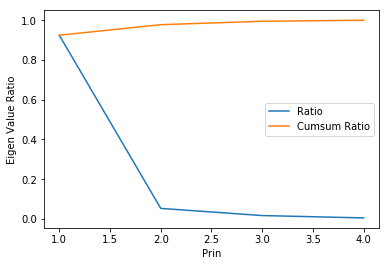

In [13]:
plt.plot(ds_pca["Prin"], ds_pca["EigenValueRatio"], label = "Ratio")
# 누적된 고유값 비율 그래프 생성
plt.plot(ds_pca["Prin"], ds_pca["CumsumEigenValueratio"], label = "Cumsum Ratio")

plt.ylabel("Eigen Value Ratio")
plt.xlabel("Prin")
plt.legend(loc="best")